<a href="https://colab.research.google.com/github/ArasHEsLaM1/1-Performance-comparison-of-Gradient-Boosting-algorithms-for-Forex-market-Prediction-A-Study-on-Lig/blob/main/Jadi_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. ابتدا کتابخانه ها را وارد میکنیم
  
2. فایل را با استفاده از پانداس میخوانیم و در  df میریزیم
3. دیتا را پیش پردازش میکنیم که برای پاس دادن به مدل آماده باشد
4. دیتا ست را به دو قسمت با سایز 80% بع 20 % تقسیم میکنیم
5. مدل را ترین میکنیم
6. یک بیمار فرضی با مقادیری بالا ست میکنیم 
7. بر اساس مدل پیش بینی میکنیم



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [4]:

# Load the dataset
df = pd.read_csv("heart.csv")


In [5]:

# Preprocessing
X = df.drop('output', axis=1)
y = df['output']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


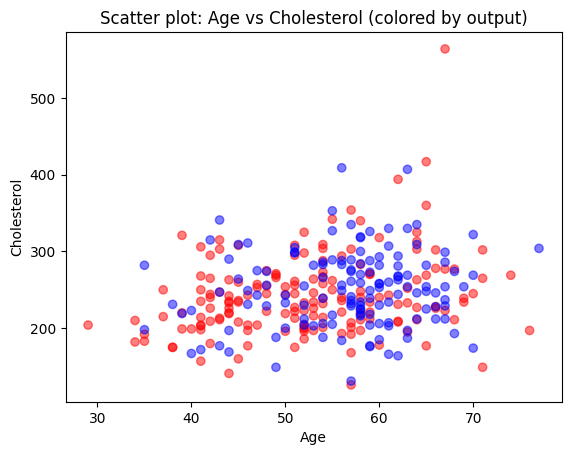

In [6]:
# Scatter plot of selected features
plt.scatter(X['age'], X['chol'], c=y, cmap='bwr', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter plot: Age vs Cholesterol (colored by output)')
plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Algorithm: KNN
Accuracy: 91.80327868852459
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
[[27  2]
 [ 3 29]]



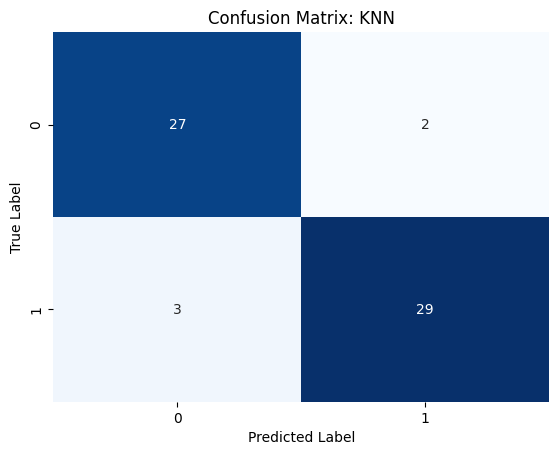

Algorithm: Decision Tree
Accuracy: 75.40983606557377
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Confusion Matrix:
[[25  4]
 [11 21]]



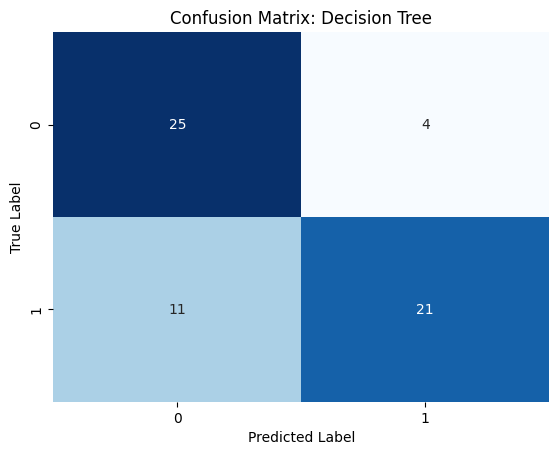

Algorithm: SVM
Accuracy: 86.88524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[26  3]
 [ 5 27]]



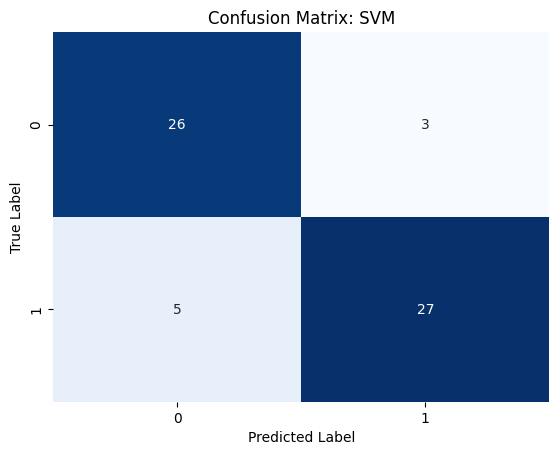

In [8]:

# Train and evaluate multiple classification algorithms
algorithms = [
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]

for algorithm_name, algorithm in algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    
    # Calculate accuracy, classification report, and confusion matrix
    accuracy = np.mean(y_pred == y_test) * 100
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print algorithm's results
    print(f"Algorithm: {algorithm_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)
    print()
    
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {algorithm_name}')
    plt.show()


Algorithm: KNN
Accuracy: 91.80327868852459
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
[[27  2]
 [ 3 29]]



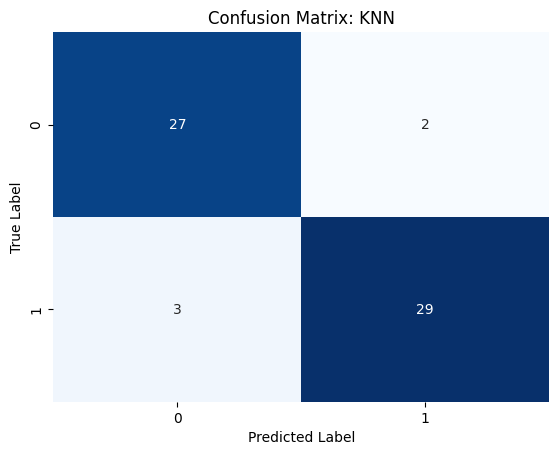

The patient has a high chance of a heart attack (Algorithm: KNN).

Algorithm: Decision Tree
Accuracy: 75.40983606557377
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Confusion Matrix:
[[25  4]
 [11 21]]



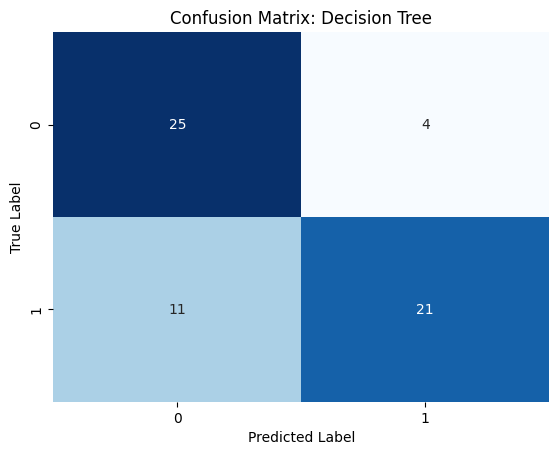

The patient has a low chance of a heart attack (Algorithm: Decision Tree).

Algorithm: SVM
Accuracy: 86.88524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[26  3]
 [ 5 27]]



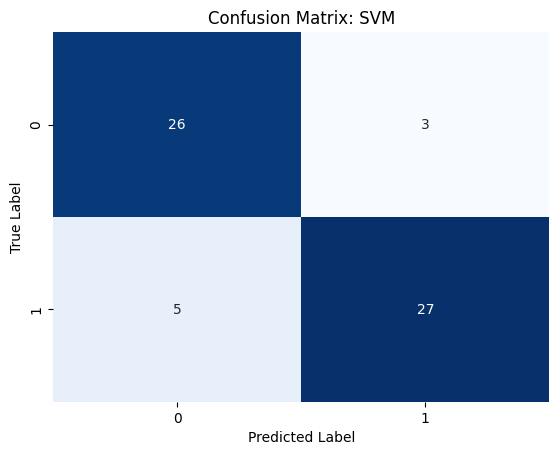

The patient has a high chance of a heart attack (Algorithm: SVM).



In [9]:

# Choose the best performing algorithm based on your criteria

# Make a prediction for a new patient
new_patient = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

for algorithm_name, algorithm in algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    
    # Calculate accuracy, classification report, and confusion matrix
    accuracy = np.mean(y_pred == y_test) * 100
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Print algorithm's results
    print(f"Algorithm: {algorithm_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)
    print()
    
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {algorithm_name}')
    plt.show()
    
    # Make prediction for a new patient
    prediction = algorithm.predict(new_patient)
    # Interpret the prediction
    if prediction[0] == 0:
        print(f"The patient has a low chance of a heart attack (Algorithm: {algorithm_name}).")
    else:
        print(f"The patient has a high chance of a heart attack (Algorithm: {algorithm_name}).")
    print()